
Tamaño imagen 1: (996, 908, 3) pix
Tamaño imagen 2: (996, 908, 3) pix
Tamaño imagen 3: (996, 908, 3) pix




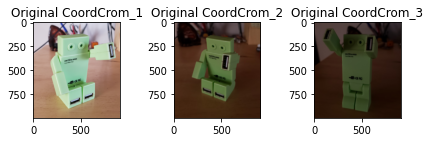

In [134]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


# Ahora quiero verla como imagen en color
img1 = cv.imread('CoordCrom_1.png')
img2 = cv.imread('CoordCrom_2.png')
img3 = cv.imread('CoordCrom_3.png')

# Dimensión de la imagen
print('\nTamaño imagen 1: {} pix'.format(img1.shape))
print('Tamaño imagen 2: {} pix'.format(img2.shape))
print('Tamaño imagen 3: {} pix'.format(img3.shape))
print('\n')

# Paso la imagen de BRG a RGB
imgRGB1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
imgRGB2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
imgRGB3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)

################# FIG: originales ##############################################
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(131)
ax1.imshow(imgRGB1)
ax1.set_title('Original CoordCrom_1')

ax2=plt.subplot(132)
ax2.imshow(imgRGB2)
ax2.set_title('Original CoordCrom_2')

ax3=plt.subplot(133)
ax3.imshow(imgRGB3)
ax3.set_title('Original CoordCrom_3')

fig.tight_layout()    
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]


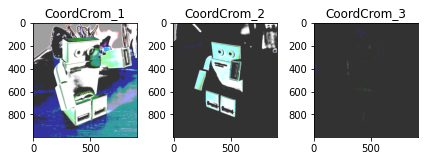

In [135]:
###################### Método Cromático#########################################
def coordenadas_cromaticas(imagen,brillo,contraste):
    
    B,G,R =cv.split(imagen)

    suma=0
    imgLayerB = B.copy()
    imgLayerG = G.copy()
    imgLayerR = R.copy()
    s=150
    for i in range(B.shape[0]):
      for j in range(B.shape[1]):
        suma=(B[i,j]+G[i,j]+R[i,j])
        imgLayerB[i,j]=B[i,j]
        imgLayerG[i,j]=G[i,j]
        imgLayerR[i,j]=R[i,j]
        
        if suma ==0:
          imgLayerB[i,j]=0
          imgLayerG[i,j]=0
          imgLayerR[i,j]=0
        else:
          pixelB=(B[i,j]/suma)
          pixelR=(R[i,j]/suma)
          pixelG=(G[i,j]/suma)
          imgLayerB[i,j]=pixelB
          imgLayerG[i,j]=pixelG
          imgLayerR[i,j]=pixelR
          

    imgLayerB=cv.multiply(imgLayerB,contraste)
    imgLayerR=cv.multiply(imgLayerR,contraste)
    imgLayerG=cv.multiply(imgLayerG,contraste) 

    imgLayerB=cv.add(imgLayerB,brillo)
    imgLayerR=cv.add(imgLayerR,brillo)
    imgLayerG=cv.add(imgLayerG,brillo) 

    imgLayerB=imgLayerB.round()
    imgLayerR=imgLayerR.round()
    imgLayerG=imgLayerG.round()

    np.clip(imgLayerB, 0, 255, out=imgLayerB)   # Clip trunca a lo que se le diga (0 a 255)
    np.clip(imgLayerR, 0, 255, out=imgLayerR)   # Clip trunca a lo que se le diga (0 a 255)
    np.clip(imgLayerG, 0, 255, out=imgLayerG)   # Clip trunca a lo que se le diga (0 a 255)

    imgLayerB=imgLayerB.astype('uint8') # Hay que castear a 8 bits
    imgLayerR=imgLayerR.astype('uint8') # Hay que castear a 8 bits
    imgLayerG=imgLayerG.astype('uint8') # Hay que castear a 8 bits

    imgResultado = cv.merge ([imgLayerB,imgLayerG,imgLayerR]) 
    imgResultado = cv.cvtColor(imgResultado,cv.COLOR_BGR2RGB)

    return imgResultado

#######################Llamadas al método ######################################
img1= coordenadas_cromaticas(imgRGB1,50,110)
img2= coordenadas_cromaticas(imgRGB2,50,110)
img3= coordenadas_cromaticas(imgRGB3,50,110)

################# FIG: Cromáticas ##############################################
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(131)
ax1.imshow(img1)
ax1.set_title('CoordCrom_1')

ax2=plt.subplot(132)
ax2.imshow(img2)
ax2.set_title('CoordCrom_2')

ax3=plt.subplot(133)
ax3.imshow(img3)
ax3.set_title('CoordCrom_3')

fig.tight_layout()    
plt.show()

**CONCLUSIONES:** de los resultados obtenidos se observa que la imagen mas ideal es la imagen "CoordCrom2.png", pues permite resaltar el rebot y unificar el fondo.